In [16]:
import pickle
import pandas as pd
import numpy as np
pd.options.display.max_columns=999


In [ ]:
with open('../data/pickles/df_2019.p', 'rb') as read_file:
    df = pickle.load(read_file)

In [8]:
df.head()

,index,excisetaxnbr,major,minor,documentdate,saleprice,recordingnbr,volume,page,platnbr,plattype,platlot,platblock,sellername,buyername,propertytype,principaluse,saleinstrument,afforestland,afcurrentuseland,afnonprofituse,afhistoricproperty,salereason,propertyclass,salewarning,index,major,minor,bldgnbr,nbrlivingunits,address,buildingnumber,fraction,directionprefix,streetname,streettype,directionsuffix,zipcode,stories,bldggrade,bldggradevar,sqft1stfloor,sqfthalffloor,sqft2ndfloor,sqftupperfloor,sqftunfinfull,sqftunfinhalf,sqfttotliving,sqfttotbasement,sqftfinbasement,finbasementgrade,sqftgaragebasement,sqftgarageattached,daylightbasement,sqftopenporch,sqftenclosedporch,sqftdeck,heatsystem,heatsource,brickstone,viewutilization,bedrooms,bathhalfcount,bath3qtrcount,bathfullcount,fpsinglestory,fpmultistory,fpfreestanding,fpadditional,yrbuilt,yrrenovated,pcntcomplete,obsolescence,pcntnetcondition,condition,addnlcost,index:1,major:1,minor:1,propname,platname,platlot,platblock,range,township,section,quartersection,proptype,area,subarea,specarea,specsubarea,districtname,levycode,currentzoning,hbuasifvacant,hbuasimproved,presentuse,sqftlot,watersystem,sewersystem,access,topography,streetsurface,restrictiveszshape,inadequateparking,pcntunusable,unbuildable,mtrainier,olympics,cascades,territorial,seattleskyline,pugetsound,lakewashington,lakesammamish,smalllakerivercreek,otherview,wfntlocation,wfntfootage,wfntbank,wfntpoorquality,wfntrestrictedaccess,wfntaccessrights,wfntproximityinfluence,tidelandshoreland,lotdepthfactor,trafficnoise,airportnoise,powerlines,othernuisances,nbrbldgsites,contamination,dnrlease,adjacentgolffairway,adjacentgreenbelt,historicsite,currentusedesignation,nativegrowthprotesmt,easements,otherdesignation,deedrestrictions,developmentrightspurch,coalminehazard,criticaldrainage,erosionhazard,landfillbuffer,hundredyrfloodplain,seismichazard,landslidehazard,steepslopehazard,stream,wetland,speciesofconcern,sensitiveareatract,waterproblems,transpconcurrency,otherproblems,year
3,4,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,3,N,N,N,N,1,8,,72869,213043,120,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,201368,213043,120,,DUVALL HILLS DIV NO. 04,12,,6,26,13,SE,R,70.0,2.0,None,None,DUVALL,1155,R4.5,1,1,2,10523,2,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2019
84,164,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,443099,940652,630,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500,411118,940652,630,,WILDERNESS ESTATES,63,,6,22,27,SW,R,56.0,3.0,None,None,MAPLE VALLEY,1813,R-6,1,1,2,7392,2,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2019
232,445,2980836,937630,0695,2019-03-28,550000,20190404001008,,,,,,,WOLFE BRUCE A+MEGAN D ...,ALBRECHT BRYSON+ALBRECHT STEPHEN+KATHERINE BER...,3,6,3,N,N,N,N,1,8,,442139,937630,695,1,1,8013 11TH AVE NW 98117,8013,,,11TH,AVE,NW,98117,3.0,8,0,370,0,540,650,0,0,1560,0,0,0,0,240,N,0,0,200,4,3,0,N,2,1,0,1,0,1,0,0,1985,0,0,0,0,3,0,434504,937630,695,,WHITMAN THE ADD TO BALLARD,43,3,3,25,1,NW,R,82.0,11.0,None,None,SEATTLE,10,RSL (M),1,1,2,2500,2,2,4,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,2019
292,517,2975376,098400,0450,2019-02-20,409950,20190228000242,,,,,,,PHAM HONG+CO VIVIAN ...,EMBREE NICHOLAS DAVIS+KATIE ELIZABETH ...,11,6,3,N,N,N,N,1,8,,23849,98400,450,1,1,12704 SE 188TH PL 98058,12704,,SE,188TH,PL,,98058,1.0,7,0,1250,0,0,0,0,0,1850,1220,600,7,520,0,Y,0,0,140,5,2,0,,3,1,0,2,0,1,0,1,1968,0,0,0,0,3,0,43502,98400,450,,BOULEVARD LANE DIV NO. 01,4

In [13]:
import statsmodels.api as sm
y = df.saleprice
X = df.sqfttotliving
X = sm.add_constant(X)

In [20]:
# FMM
from statsmodels.api import OLS

lr = OLS(y, X)
model = lr.fit()

model.summary()
resid = model.resid

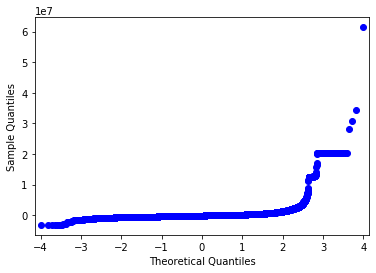

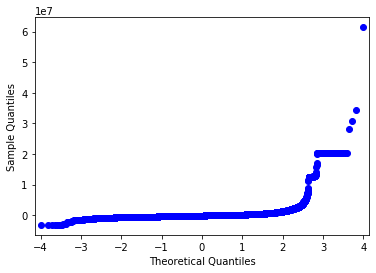

In [21]:
# QQplot does not look good
sm.qqplot(resid)


Text(0.5, 1.0, 'Original DF')

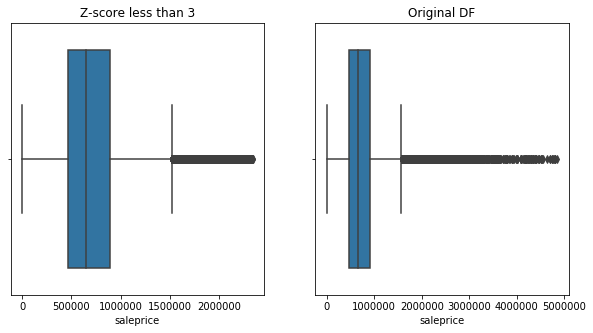

In [39]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# Let's try removing some outliers outside of zscore of 3

df_nofliers = df[np.abs(stats.zscore(df.saleprice)) < 3]

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df_nofliers.saleprice, ax=ax[0])
ax[0].set_title('Z-score less than 3')
sns.boxplot(df.saleprice, ax=ax[1])
ax[1].set_title('Original DF')

In [54]:
# FMM

y = df_nofliers.saleprice
X = df_nofliers.sqfttotliving
X = sm.add_constant(X)

from statsmodels.api import OLS

lr = OLS(y, X)
model = lr.fit()

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                 1.365e+04
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:38:30   Log-Likelihood:            -4.1002e+05
No. Observations:               29097   AIC:                         8.201e+05
Df Residuals:                   29095   BIC:                         8.201e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.326e+05   4651.115     50.014      0.000    2.24e+05    2.42e+05
sqfttotliving   234.5154      2.008    116.817      0.000     230.580     238.450
==============================================================================
Omnibus:                     4426.897   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15171.262
Skew:                           0.763   Prob(JB):                         0.00
Kurtosis:                       6.192   Cond. No.                     5.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

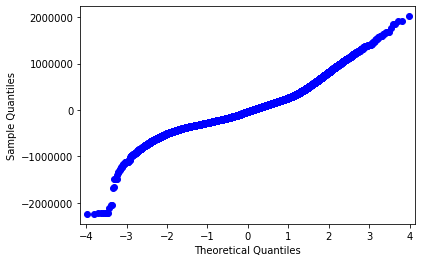

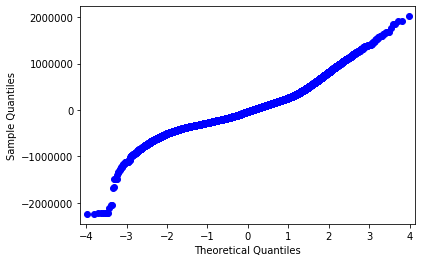

In [44]:
# Better qqplot, but still not normally distibuted
y_hat = model.predict(X)
sm.qqplot(model.resid)



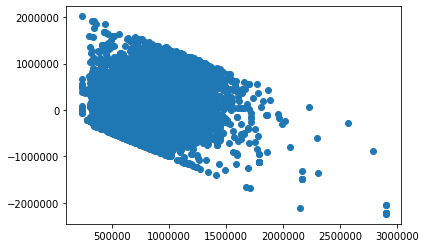

In [49]:
plt.scatter(y_hat, resid)

The residuals have a clear pattern, a rectangle than restricts how far off the predictions are

# Let's add stories, although there may be plenty of covariance with sqfttotliving

In [61]:
# Yes, high covariance
df[['sqfttotliving', 'stories']].corr()

,sqfttotliving,stories
sqfttotliving,1.000000,0.379396
stories,0.379396,1.000000


In [58]:
y = df_nofliers.saleprice
X = df_nofliers[['sqfttotliving', 'stories']]
X = sm.add_constant(X)

from statsmodels.api import OLS

lr = OLS(y, X)
model = lr.fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     7038.
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:39:33   Log-Likelihood:            -4.0988e+05
No. Observations:               29097   AIC:                         8.198e+05
Df Residuals:                   29094   BIC:                         8.198e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.64e+05   6124.574     26.776      0.000    1.52e+05    1.76e+05
sqfttotliving   220.6098      2.157    102.296      0.000     216.383     224.837
stories        6.361e+04   3717.694     17.109      0.000    5.63e+04    7.09e+04
==============================================================================
Omnibus:                     4532.695   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15193.744
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                       6.171   Cond. No.                     8.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

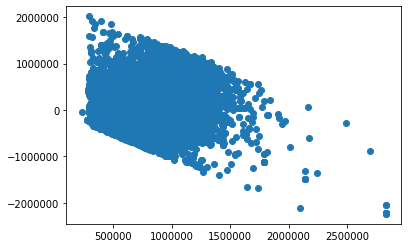

In [59]:
y_hat = model.predict()
resids = model.resid
plt.scatter(y_hat, resid)